### Predict the cancer mortality rate per capita (100000) using several demographic variables.

#### Data set Description
TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mea
ean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

In [1]:
#import necessery packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
cancer_df=pd.read_csv("C:\\Users\\HP\Desktop\Datascience\let the confess data\\cancer_reg.csv")

In [3]:
cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
cancer_df.shape

(3047, 34)

In [5]:
cancer_df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [7]:
cancer_df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(cancer_df)

Your selected dataframe has 34 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
PctSomeCol18_24,2285,75.0
PctPrivateCoverageAlone,609,20.0
PctEmployed16_Over,152,5.0


clearly we can see that there are null values present in PctSomeCol18_24,PctEmployed16_over,PctPrivateCoverageAlone columns 

We have more than 75% of  null values in PctSomeCol18_24 column which is Percent of county residents ages 18-24 highest education attained: some college which does not have much impact on target column we drop that column 

We can also find that the percentage of people with private insurance does not have significant relation to mortality so we are dropping the column 


In [10]:
cancer_df.drop(["PctSomeCol18_24","PctPrivateCoverageAlone"], axis=1,inplace=True)
cancer_df.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [11]:
# replacing the NaN values with median 
cancer_df['PctEmployed16_Over'].fillna(cancer_df['PctEmployed16_Over'].median, inplace = True)

In [12]:
cancer_df.shape

(3047, 32)

In [13]:
cancer_df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [14]:
#There were a lot of columns that seemed insignificant in determining the deathrate and so we dropped those columns and considered the following only for our model.
cancer_df=cancer_df[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over','TARGET_deathRate']]

In [15]:
cancer_df.shape

(3047, 16)

In [16]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avgAnnCount        3047 non-null   float64
 1   avgDeathsPerYear   3047 non-null   int64  
 2   incidenceRate      3047 non-null   float64
 3   medIncome          3047 non-null   int64  
 4   popEst2015         3047 non-null   int64  
 5   povertyPercent     3047 non-null   float64
 6   MedianAgeMale      3047 non-null   float64
 7   MedianAgeFemale    3047 non-null   float64
 8   AvgHouseholdSize   3047 non-null   float64
 9   PercentMarried     3047 non-null   float64
 10  PctNoHS18_24       3047 non-null   float64
 11  PctHS18_24         3047 non-null   float64
 12  PctBachDeg18_24    3047 non-null   float64
 13  PctHS25_Over       3047 non-null   float64
 14  PctBachDeg25_Over  3047 non-null   float64
 15  TARGET_deathRate   3047 non-null   float64
dtypes: float64(13), int64(3)

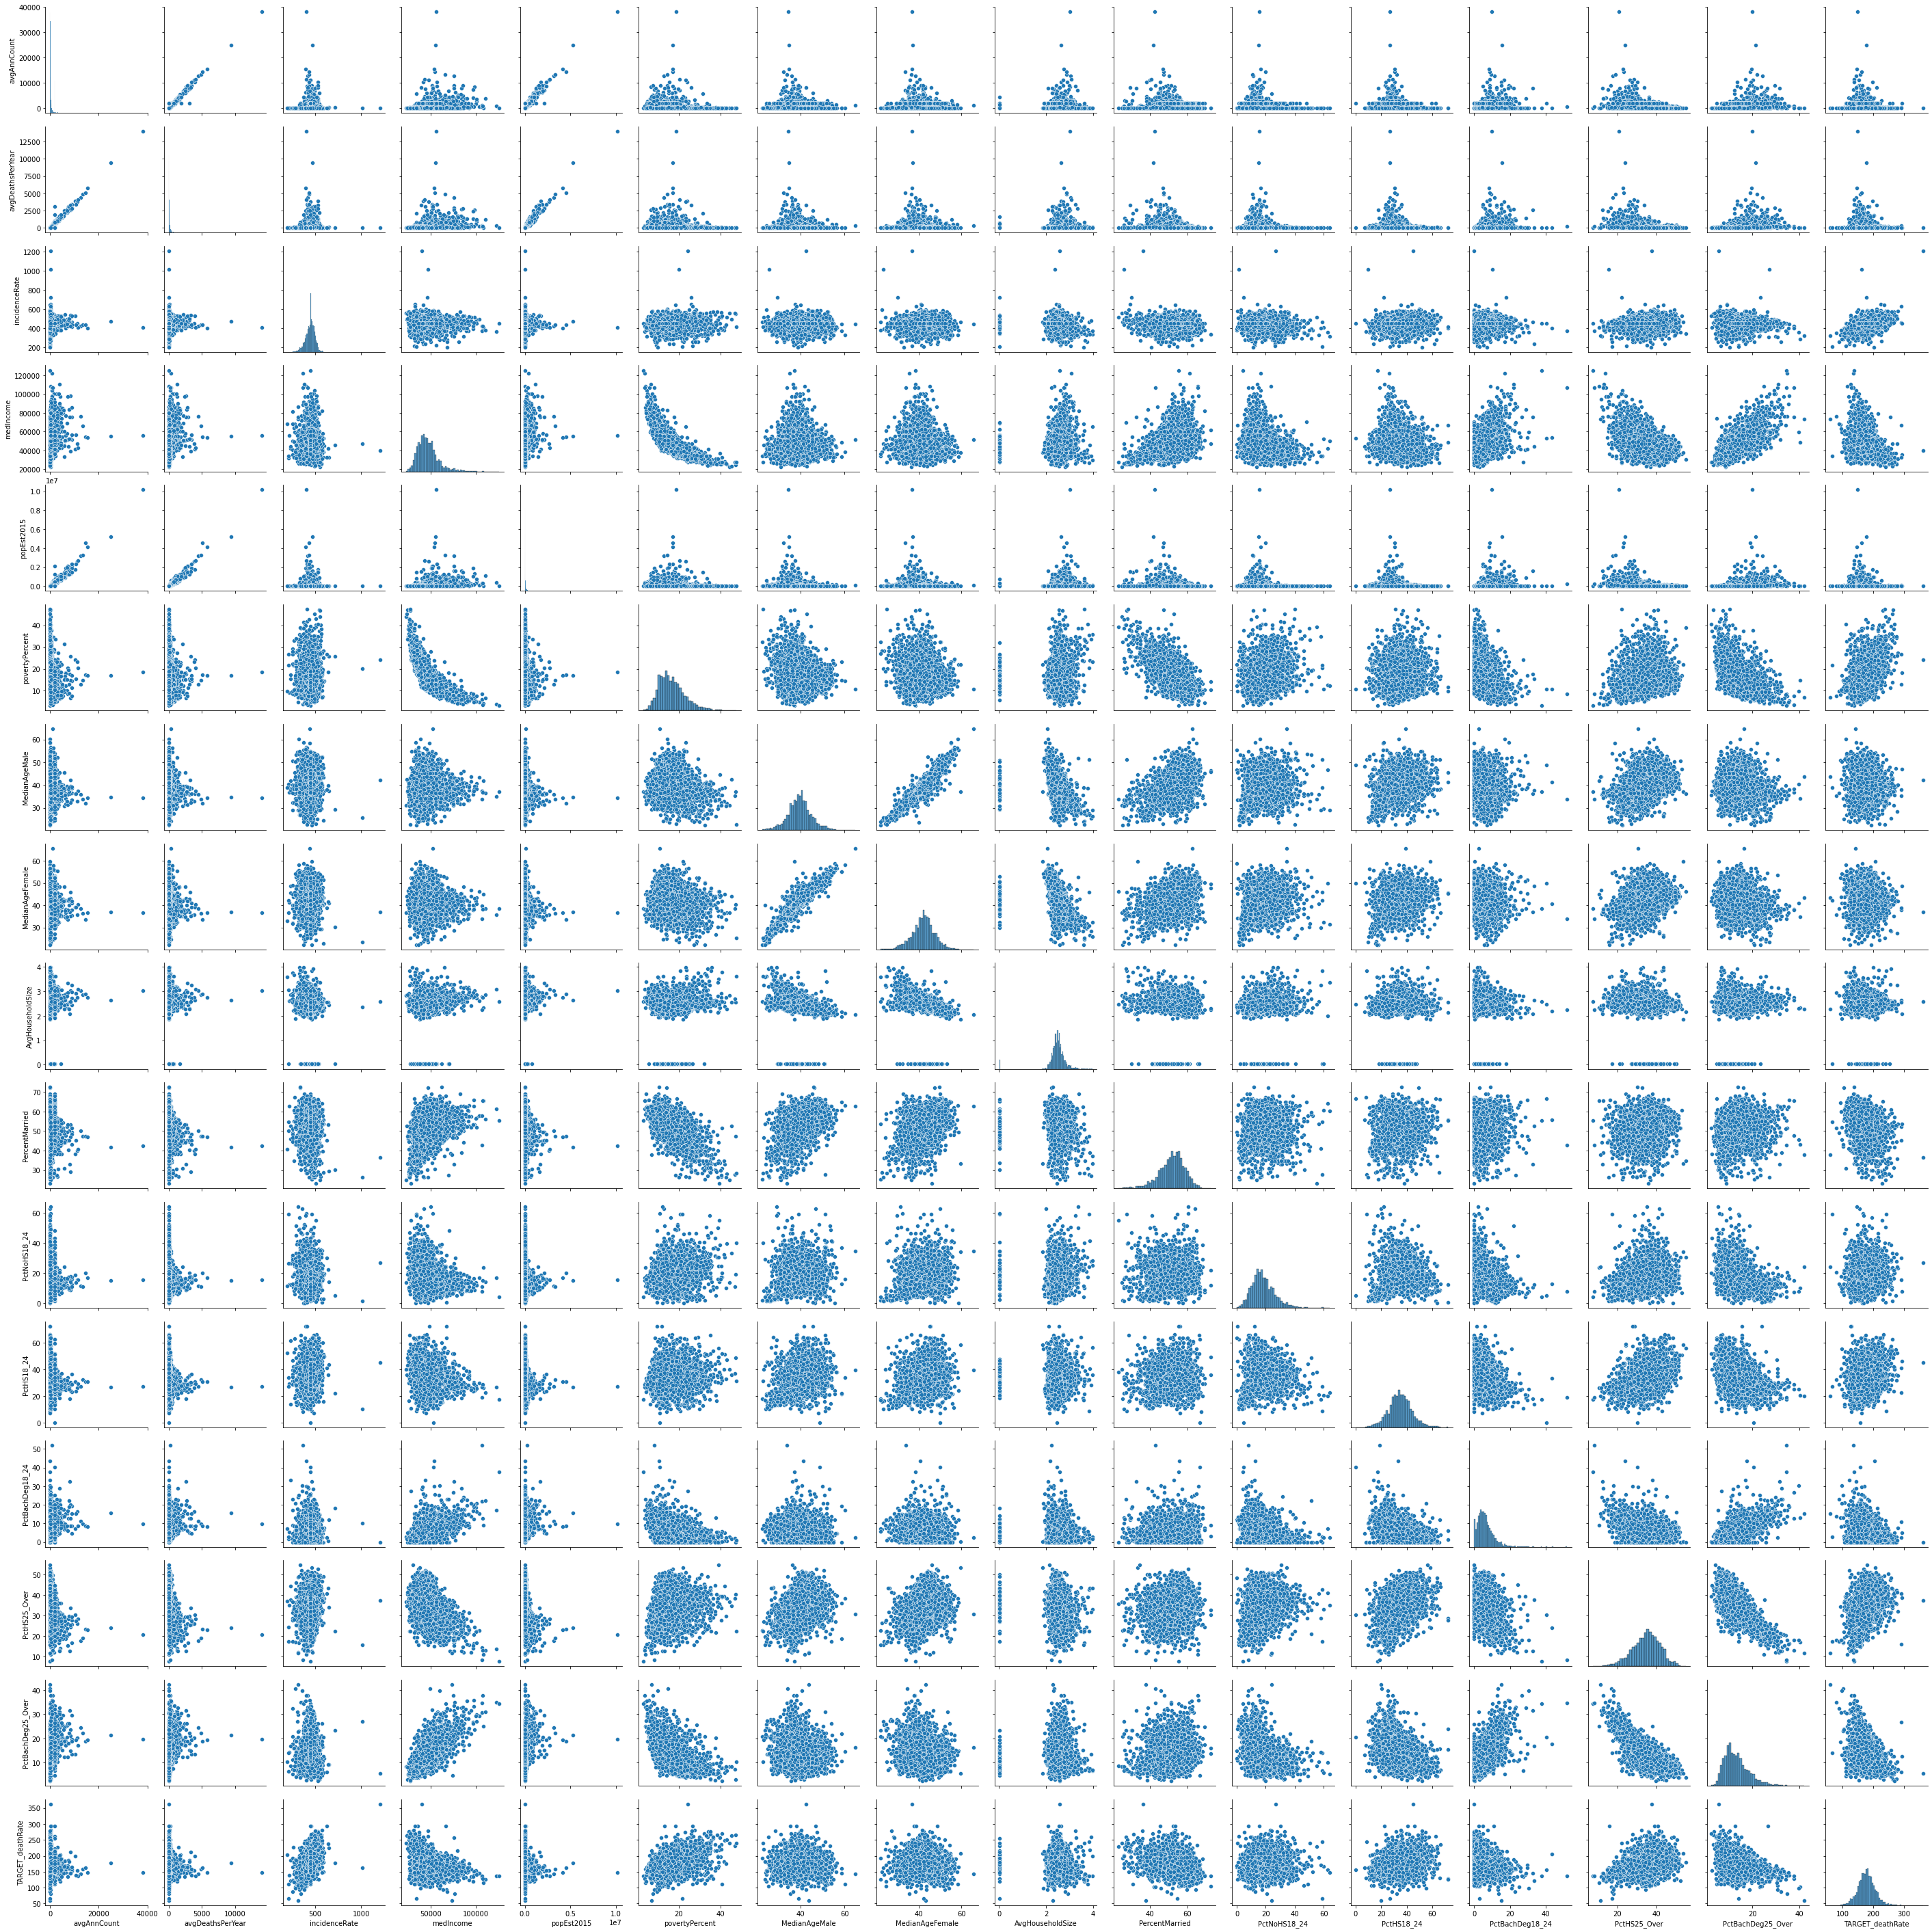

In [17]:
sns.pairplot(cancer_df) 

In [18]:
#Since, the data is highly skewed and there are outliers, we will take a log of the varibles
cancer_df=np.log(cancer_df[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over','TARGET_deathRate']])

In [19]:
cancer_df.isin([-np.inf]).any()

avgAnnCount          False
avgDeathsPerYear     False
incidenceRate        False
medIncome            False
popEst2015           False
povertyPercent       False
MedianAgeMale        False
MedianAgeFemale      False
AvgHouseholdSize     False
PercentMarried       False
PctNoHS18_24          True
PctHS18_24            True
PctBachDeg18_24       True
PctHS25_Over         False
PctBachDeg25_Over    False
TARGET_deathRate     False
dtype: bool

In [20]:
# replacing the inf values with NaN
cancer_df.replace(-np.inf,np.NaN,inplace=True)

In [21]:
cancer_df.isnull().sum()

avgAnnCount            0
avgDeathsPerYear       0
incidenceRate          0
medIncome              0
popEst2015             0
povertyPercent         0
MedianAgeMale          0
MedianAgeFemale        0
AvgHouseholdSize       0
PercentMarried         0
PctNoHS18_24           2
PctHS18_24             1
PctBachDeg18_24      118
PctHS25_Over           0
PctBachDeg25_Over      0
TARGET_deathRate       0
dtype: int64

In [22]:
# removing the NaN values 
cancer_df=cancer_df.dropna(axis=0)

<AxesSubplot:>

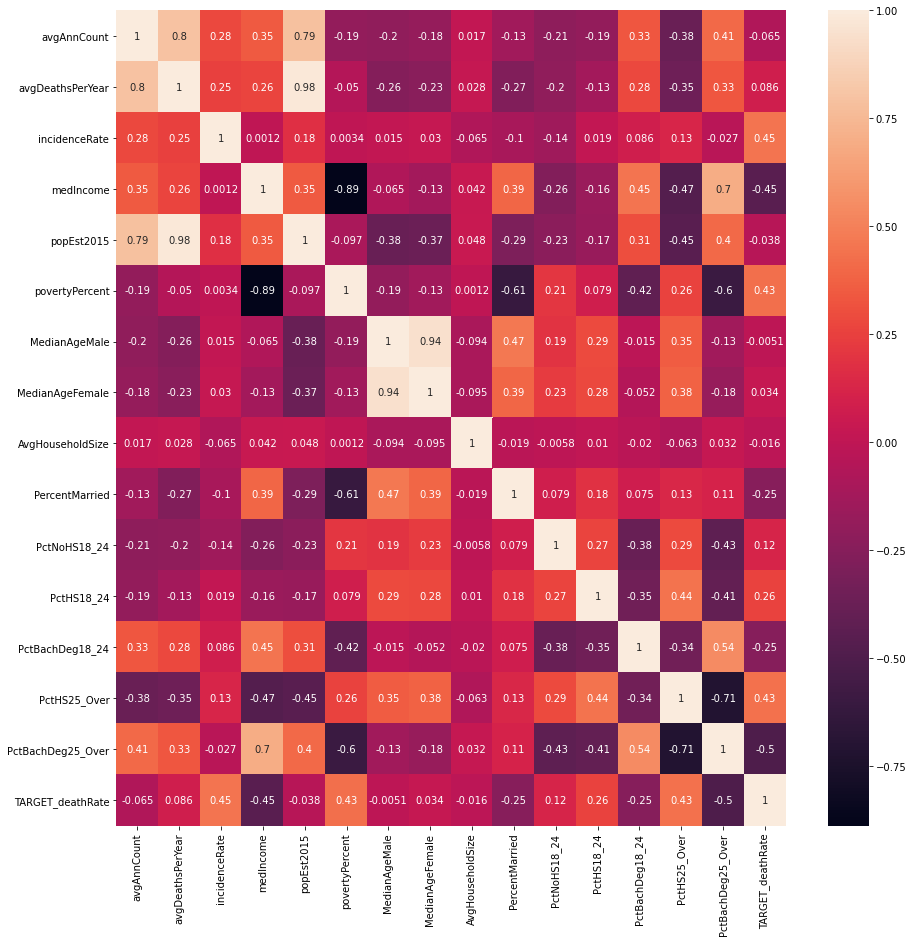

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(cancer_df.corr(),annot=True)

1. mean mortatlity rate and average death per year are highly corelated 

2. population of the counttry is highly corelated to average death and mean mortality rate 

3. median age of female nad men are highly corelated 



### Dimensionality reduction using PCA

In [24]:
Y=cancer_df["TARGET_deathRate"]
X=cancer_df.drop('TARGET_deathRate',axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.21,random_state=0)

In [26]:
# normalizaton of features 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [27]:
# dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
x_reduced=pca.fit_transform(X_train)
xt_reduced=pca.transform(X_test)

### Model Building -Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
LR=LinearRegression()
LR.fit(x_reduced,y_train)
print("Training score:",LR.score(x_reduced,y_train))
print("Test score:",LR.score(xt_reduced,y_test))


Training score: 0.7575989192662017
Test score: 0.7585346799103013


we get test and train score same which gives the best results. we do cross validation to emove overfiiting or under fitting.

### K-fold cross validation

In [29]:
from sklearn.model_selection import cross_val_score
print('Cross-validation scores:',cross_val_score(LR,X_train,y_train,) )
print('Cross-validation scores:',cross_val_score(LR,X_test,y_test) )
print('Average Train score:',cross_val_score(LR,X_train,y_train).mean())
print('Average Test score:',cross_val_score(LR,X_test,y_test).mean())

Cross-validation scores: [0.78869162 0.76534552 0.70599849 0.73968952 0.75237062]
Cross-validation scores: [0.72426752 0.81000502 0.78237271 0.67768889 0.75577163]
Average Train score: 0.7504191540036801
Average Test score: 0.7500211542908966


After doing cross validation we get same  test score.We use Lasso  and Ridge regression to reduce complexity and improve the performance of model 

### Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha =0.1)

In [31]:
lasso_reg.fit(x_reduced,y_train)

Lasso(alpha=0.1)

In [32]:
lasso_reg.score(x_reduced,y_train)

0.01569209608965061

In [33]:
lasso_reg.score(xt_reduced,y_test)

0.014319321471547353

we get lowest score for the Lasso regression so we do cross validation and hyper parameter tuning for further evaluation and improving the performance of the model 

### Hyper Parameter Tunning 

In [34]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_lasso = GridSearchCV(Lasso(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_lasso.fit(x_reduced, y_train)


print('Lasso: Best Parameters',model_lasso.best_params_)


y_pred_lasso = model_lasso.predict(xt_reduced)
print(model_lasso.score(xt_reduced,y_test))

# Tuning hyper-parameters

Lasso: Best Parameters {'alpha': 0.0001}
0.7570791729008068


after hyper parameter tunning  we get an accuracy of 75 % on alpha .0001 and the model performs well.To check the accuracy of model on unseen data better we use cross validtaion 

### Cross validation

In [35]:
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.0001)
lasso.fit(x_reduced,y_train)
print('Cross-validation scores:',cross_val_score(lasso,x_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(lasso,xt_reduced,y_test) )
print('Average Train score:',cross_val_score(lasso,x_reduced,y_train).mean())
print('Average Test score:',cross_val_score(lasso,xt_reduced,y_test).mean())

Cross-validation scores: [0.78888872 0.76678504 0.70561615 0.73994761 0.75210068]
Cross-validation scores: [0.72638553 0.80672024 0.77989514 0.68002485 0.75714657]
Average Train score: 0.7506676396201357
Average Test score: 0.7500344650287425


cross validatin also gve the best results and the model performs well on unseen data

### Ridge regression

In [36]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1.0)

In [37]:
ridge_reg.fit(x_reduced,y_train)

Ridge()

In [38]:
ridge_reg.score(x_reduced,y_train)

0.7562120609576282

In [39]:
ridge_reg.score(xt_reduced,y_test)

0.7510116832846141

without hyper parameter tuuning ridge regression gives best accuravy and the model is performing well 

### Hyper Parameter Tunning

In [40]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_ridge = GridSearchCV(Ridge(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_ridge.fit(x_reduced, y_train)


print('Ridge: Best Parameters',model_ridge.best_params_)


y_pred_ridge = model_ridge.predict(xt_reduced)
print(model_ridge.score(xt_reduced,y_test))


# Tuning hyper-parameters

Ridge: Best Parameters {'alpha': 0.01}
0.7584667138326256


after hyper paraneter tuning also the model gives the same accuracy. we can check the model accuracy by cross validating the model on unseen data 


In [41]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_reduced,y_train)
print('Cross-validation scores:',cross_val_score(ridge,x_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(ridge,xt_reduced,y_test) )
print('Average Train score:',cross_val_score(ridge,x_reduced,y_train).mean())
print('Average Test score:',cross_val_score(ridge,xt_reduced,y_test).mean())

Cross-validation scores: [0.78871651 0.76535908 0.70597397 0.73971071 0.75234582]
Cross-validation scores: [0.72481959 0.80943028 0.78163325 0.67829347 0.75602945]
Average Train score: 0.7504212187251017
Average Test score: 0.7500412074944258


after cross validating it gives the best accuracy

### KNN Regressor 

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)

In [43]:
knn.fit(x_reduced,y_train)

KNeighborsRegressor(n_neighbors=4)

In [44]:
knn.score(x_reduced,y_train)

0.6693417239763799

In [45]:
knn.score(xt_reduced,y_test)

0.3973822466093515

we can clearly see that there is overfiiting of data. so we do hyperparameter tuning to remove the overfitting 

### Hyper Parameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

model_knn = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_knn.fit(x_reduced, y_train)


print('KNN: Best Parameters',model_knn.best_params_)


y_pred_knn = model_knn.predict(xt_reduced)
print(model_knn.score(xt_reduced,y_test))


KNN: Best Parameters {'n_neighbors': 12}
0.45672780386079037


At n_neighbors 12 we get the accuracy of 45% which is not a good accuracy we can check how the nodel performs by cross validation.

### Cross validation

In [47]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_reduced,y_train)
print('Cross-validation scores:',cross_val_score(knn,x_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(knn,xt_reduced,y_test) )
print('Average Train score:',cross_val_score(knn,x_reduced,y_train).mean())
print('Average Test score:',cross_val_score(knn,xt_reduced,y_test).mean())

Cross-validation scores: [0.54327468 0.46892544 0.42839943 0.50850853 0.41939917]
Cross-validation scores: [0.29201662 0.29686763 0.33668734 0.21258443 0.41680717]
Average Train score: 0.47370144925027374
Average Test score: 0.3109926389935363


after cross validation we can see the model does not perform well on unseen data 

### SVM Regessor 

In [48]:
from sklearn.svm import SVR

In [49]:
svm_reg = SVR(C= 80,kernel = 'rbf')
svm_reg.fit(x_reduced,y_train)

SVR(C=80)

In [50]:
svm_reg.score(x_reduced,y_train)

0.846962720920605

In [51]:
svm_reg.score(xt_reduced,y_test)

0.6525836650095969

Training score is high than test score which is clearly overfitting of data. we can do hyper paarmeter tunning to improve the performance 

### Hyper Parameter Tunning

In [52]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                     'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4,5],
                     'C': [0.01, 0.1, 1, 10, 100]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(x_reduced, y_train)


print('SVM: Best Parameters',model.best_params_)


y_pred_svr = model.predict(xt_reduced)
print(model.score(xt_reduced,y_test))


# Tuning hyper-parameters

SVM: Best Parameters {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.773174725212741


### Cross Validation

In [53]:
svrrbf = SVR(kernel='rbf',gamma=0.01,C=10)
svrrbf.fit(x_reduced, y_train)
print('Cross-validation scores:',cross_val_score(svrrbf,x_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(svrrbf,xt_reduced, y_test) )
print('Average Train score:',cross_val_score(svrrbf,x_reduced, y_train).mean())
print('Average Test score:',cross_val_score(svrrbf,xt_reduced, y_test).mean())

Cross-validation scores: [0.81459142 0.80836194 0.75002244 0.76803785 0.76268997]
Cross-validation scores: [0.66542663 0.55423623 0.49787835 0.58001518 0.70403116]
Average Train score: 0.7807407229740605
Average Test score: 0.6003175095966056


after cross validation we can see that it fails to predict on unseen data 

### Decision Tree Regressor 

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dec_reg = DecisionTreeRegressor(max_depth= 4)

In [56]:
dec_reg.fit(x_reduced,y_train)

DecisionTreeRegressor(max_depth=4)

In [57]:
dec_reg.score(x_reduced,y_train)

0.5171764214946721

In [58]:
dec_reg.score(xt_reduced,y_test)

0.3616071984612368

we can clearly observe that the model gives low aacuray and also there is overfitting of data. we can perform hyper parameter tunnig to improve the performance of the model

In [59]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}]

print("# Tuning hyper-parameters")
print()

model_tree = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_tree.fit(x_reduced, y_train)


print('DT: Best Parameters',model_tree.best_params_)


y_pred_svr = model_tree.predict(xt_reduced)
print(model_tree.score(xt_reduced,y_test))

# Tuning hyper-parameters

DT: Best Parameters {'max_depth': 7}
0.3998152812145561


Even after hyper paarmeter tunning the model gives lowest accuracy. We can do cross validation to check how the model works on unseen data 

### Cross Validation

In [60]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(x_reduced, y_train)
print('Cross-validation scores:',cross_val_score(tree,x_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(tree,xt_reduced, y_test) )
print('Average Train score:',cross_val_score(tree,x_reduced, y_train).mean())
print('Average Test score:',cross_val_score(tree,xt_reduced, y_test).mean())

Cross-validation scores: [0.47113396 0.45366407 0.43920918 0.46930649 0.42185074]
Cross-validation scores: [-0.03249883  0.3646869   0.27638599  0.14253925  0.26704968]
Average Train score: 0.44809650052898
Average Test score: 0.21440910631766502


it does not work well on test data so model is not performing well

### Comparison of Model Accuracy 

In [61]:
Summary={'Algorithm':['Linear Regression', 'KNN Regressor','SVM', 'Decision Tree Regressor','Ridge','Lasso'], 'Best Accuracy Obtained':[0.75,0.31,0.60,0.17,0.75,0.75], 'Parameters':['n/a','K=12',['kernel:rbf','gamma=0.01','C:100'],'max_depth=7','alpha=0.1','alpha=0.0001']}
Summary_table=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters'])

In [62]:
Summary_table

,Algorithm,Best Accuracy Obtained,Parameters
0,Linear Regression,0.75,n/a
1,KNN Regressor,0.31,K=12
2,SVM,0.60,"[kernel:rbf, gamma=0.01, C:100]"
3,Decision Tree Regressor,0.17,max_depth=7
4,Ridge,0.75,alpha=0.1
5,Lasso,0.75,alpha=0.0001


**Thus, Linear regression and regularized linear regression (Ridge and Lasso) give the best results.**

**We can use Linear regression for prediction.**

In [63]:
#We will predict using Linear Regression
LR=LinearRegression()
LR.fit(x_reduced,y_train)
y_pred=LR.predict(xt_reduced)


In [64]:
#pred=np.exp(pred)
#ytest=np.exp(y_test)

In [66]:
prediction_comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [67]:
prediction_comparison.head()

,Actual,Predicted
2216,5.228431,5.195382
749,5.242805,5.194168
2815,5.216565,5.180088
2047,5.275049,5.218936
316,5.108971,5.161303


In [70]:
prediction_comparison['error']=y_test-y_pred

In [71]:
mean_squared_error=(prediction_comparison['error']**2).mean()

In [72]:
import math
root_mean_squared_error=math.sqrt(mean_squared_error)
root_mean_squared_error

0.07656918263309517

In [75]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("mse:",mse)
rmse=np.sqrt(mse)
print("rmse:", rmse)
print ("R2 Score :" , r2_score(y_test,y_pred))
print ("training set score :",LR.score(x_reduced, y_train))
print ("test set score :", LR.score(xt_reduced,y_test))

mse: 0.005862839729100289
rmse: 0.0765691826330952
R2 Score : 0.7585346799103013
training set score : 0.7575989192662017
test set score : 0.7585346799103013


From R2 score we can say that model is able to predict 75 % of variations inthe datas set and by rmse we can see the the value is very low which indiactes the best fit of the data 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


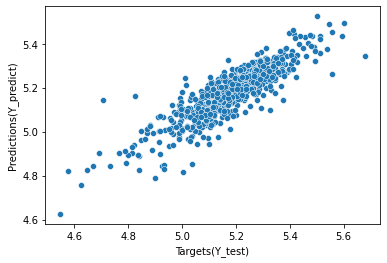

In [76]:
sns.scatterplot(y_test,y_pred)
plt.xlabel('Targets(Y_test)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

we get linear reation for the target and predictions which is the assumption of linear regression

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


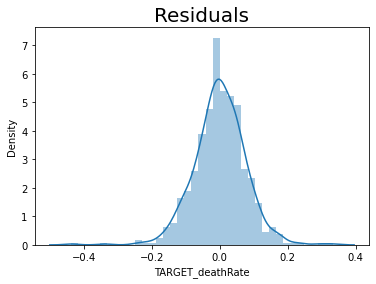

In [77]:
sns.distplot(y_test - y_pred)
plt.title('Residuals', size=20)
plt.show()

we can see the residuals  ie the errors have almost a  normal distribution which is another assumption of Linear regression 